<a href="https://colab.research.google.com/github/Gabrielandre02/Data-science/blob/main/Analisando_os_Dados_do_Airbnb_(Paris_Fran%C3%A7a).ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Análise dos Dados do Airbnb - Paris - França
---
<center><img alt="Analisando Airbnb" width="90%" src="https://i.imgur.com/hrRhDsl.png"></center>



**O [Airbnb](https://www.airbnb.com.br/) nasceu em 2007, quando dois anfitriões receberam três hóspedes em sua casa em São Francisco.**

Daí surgiu o nome: 
Airbnb é a sigla para **Air Bed & Breakfast**, que era o nome original da empresa. E assim, surgiu a ideia de manter este modelo para quem fosse a eventos na Califórnia. Rapidamente a plataforma se popularizou e, além de camas, os usuários poderiam disponibilizar casas e até castelos. Hoje, a plataforma conta com 4 milhões de anfitriões que já receberam mais de 1 bilhão de hóspedes em quase todos os países do mundo. Todos os dias, os anfitriões oferecem acomodações e atividades únicas, que possibilitam aos viajantes vivenciar o mundo de uma forma mais autêntica e conectada.

O Airbnb chegou ao Brasil em 2011 e, atualmente conta com anúncios de espaços em mais de 190 países

---
#**Um pouco sobre paris**

Capital da França, Paris é há muito tempo um dos polos de cultura e de negócios da Europa ocidental. Alguns dos grandes artistas, escritores, pensadores, estilistas de moda e chefs de cozinha do mundo viveram ou vivem em Paris. A cidade também é famosa por sua beleza. Sua área central é cortada pelo rio Sena.

<center><img alt="Analisando Airbnb" width="70%" src="https://i.imgur.com/po1iwI5.png"></center>

---

Uma das iniciativas do Airbnb é disponibilizar dados do site, para algumas das principais cidades do mundo. Por meio do portal [Inside Airbnb](http://insideairbnb.com/get-the-data.html), é possível baixar uma grande quantidade de dados para desenvolver projetos e soluções de *Data Science*.


**Neste *notebook*, iremos analisar os dados referentes à cidade Paris-França, e ver quais insights podem ser extraídos a partir de dados brutos.**

## Obtenção dos Dados


In [ ]:
import pandas as pd
import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt

In [ ]:
df_paris = pd.read_csv("http://data.insideairbnb.com/france/ile-de-france/paris/2021-12-07/visualisations/listings.csv")

## Análise dos Dados


**Dicionário das variáveis**

**Dicionário das variáveis**

* `id` - número de id gerado para identificar o imóvel
* `name` - nome da propriedade anunciada
* `host_id` - número de id do proprietário (anfitrião) da propriedade
* `host_name` - Nome do anfitrião
* `neighbourhood_group` - esta coluna não contém nenhum valor válido
* `neighbourhood` - nome do bairro
* `latitude` - coordenada da latitude da propriedade
* `longitude` - coordenada da longitude da propriedade
* `room_type` - informa o tipo de quarto que é oferecido
* `price` - preço para alugar o imóvel
* `minimum_nights` - quantidade mínima de noites para reservar
* `number_of_reviews` - número de reviews que a propriedade possui
* `last_review` - data do último review
* `reviews_per_month` - quantidade de reviews por mês
* `calculated_host_listings_count` - quantidade de imóveis do mesmo anfitrião
* `availability_365` - número de dias de disponibilidade dentro de 365 dias
* `number_of_reviews_ltm` - numero de comentarios nos ultimos 12 meses             
* `license` - registro do imovel que serao alugados as turistas(normas das leis francesas)

Antes de iniciar qualquer análise, vamos verificar a cara do nosso *dataset*, analisando as 5 primeiras entradas.

Antes de iniciar qualquer análise, vamos verificar a cara do nosso *dataset*, analisando as 5 primeiras entradas.

In [ ]:
df_paris.head()

,id,name,host_id,host_name,neighbourhood_group,neighbourhood,latitude,longitude,room_type,price,minimum_nights,number_of_reviews,last_review,reviews_per_month,calculated_host_listings_count,availability_365,number_of_reviews_ltm,license
0,5396,Explore the heart of old Paris,7903,Borzou,NaN,Hôtel-de-Ville,48.85247,2.35835,Entire home/apt,102,2,273,2021-12-08,1.80,1,58,42,7510402838018
1,7397,MARAIS - 2ROOMS APT - 2/4 PEOPLE,2626,Franck,NaN,Hôtel-de-Ville,48.85909,2.35315,Entire home/apt,112,10,288,2021-12-05,2.22,2,209,19,7510400829623
2,7964,Large & sunny flat with balcony !,22155,Anaïs,NaN,Opéra,48.87417,2.34245,Entire home/apt,130,6,6,2015-09-14,0.04,1,344,0,7510903576564
3,9359,"Cozy, Central Paris: WALK or VELIB EVERYWHERE !",28422,Bernadette,NaN,Louvre,48.86006,2.34863,Entire home/apt,75,180,0,NaN,NaN,1,117,0,"Available with a mobility lease only (""bail mo..."
4,9952,Paris petit coin douillet,33534,Elisabeth,NaN,Popincourt,48.86373,2.37093,Entire home/apt,81,4,33,2021-10-22,0.31,1,260,7,7511101582862


### **Q1. Quantos atributos (variáveis) e quantas entradas o nosso conjunto de dados possui? Quais os tipos das variáveis?**

In [ ]:
print("Entradas:\t {}".format(df_paris.shape[0]))
print("Variáveis:\t {}\n".format(df_paris.shape[1]))

display(df_paris.dtypes)

Entradas:	 49429
Variáveis:	 18



id                                  int64
name                               object
host_id                             int64
host_name                          object
neighbourhood_group               float64
neighbourhood                      object
latitude                          float64
longitude                         float64
room_type                          object
price                               int64
minimum_nights                      int64
number_of_reviews                   int64
last_review                        object
reviews_per_month                 float64
calculated_host_listings_count      int64
availability_365                    int64
number_of_reviews_ltm               int64
license                            object
dtype: object

### **Q2. Qual a porcentagem de valores ausentes no *dataset*?**

In [ ]:
(df_paris.isnull().sum() / df_paris.shape[0]).sort_values(ascending=False)

neighbourhood_group               1.000000
license                           0.431063
reviews_per_month                 0.215703
last_review                       0.215703
name                              0.000910
host_name                         0.000647
number_of_reviews                 0.000000
number_of_reviews_ltm             0.000000
availability_365                  0.000000
calculated_host_listings_count    0.000000
id                                0.000000
minimum_nights                    0.000000
room_type                         0.000000
longitude                         0.000000
latitude                          0.000000
neighbourhood                     0.000000
host_id                           0.000000
price                             0.000000
dtype: float64

Podemos ver que a coluna **"neighbourhood_group"** 100% de seus valores estao ausente. Entao iremos removela.

In [ ]:
df_paris1 = df_paris.copy()
df_paris1.drop(df_paris1[df_paris1.minimum_nights > 90].index, axis=0, inplace=True)
df_paris1.drop('neighbourhood_group', axis=1, inplace=True)


Ja na coluna **"license"** tivemos 43% de valores ausente, como e um registro do imovel. segundo as leis da frança, você geralmente não precisa declarar sua acomodação à prefeitura se:

•você aluga sua residência principal principal por menos de 4 meses por ano

•você aluga um quarto em sua residência principal principal principal (sem limite de tempo)

•Se você alugar sua residência secundária, deve enviar uma declaração simples para sua cidade.
justicaficando os valores ausente naquela coluna.

### **Q3. Qual o tipo de distribuição das variáveis?** 

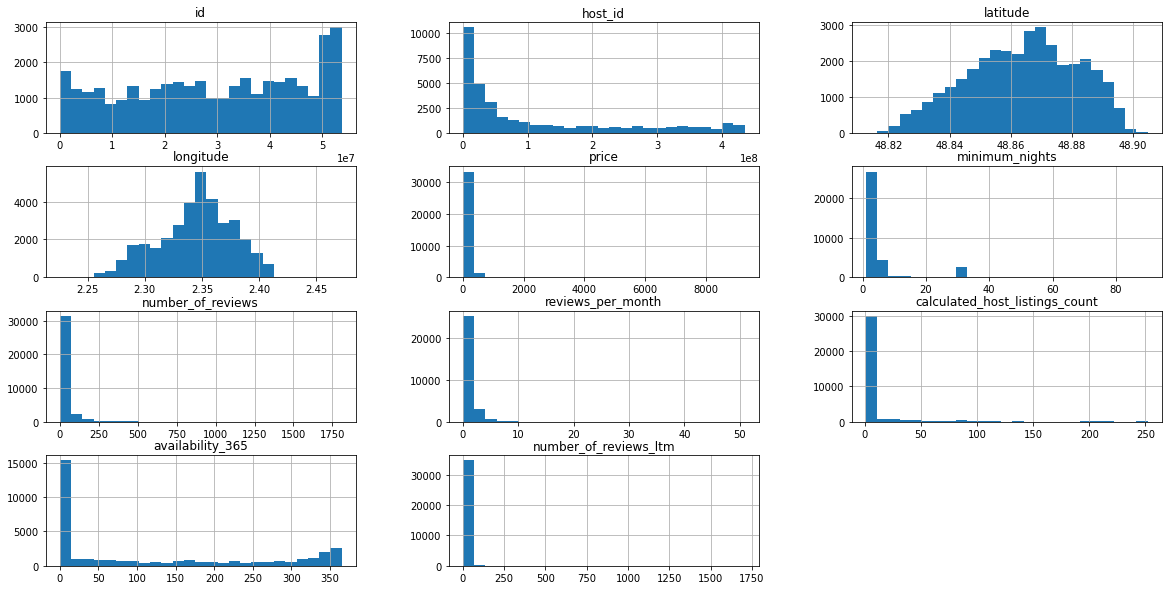

In [ ]:
df_paris1.hist(bins=25, figsize=(20,10));

### **Q4. Qual a média dos preços de aluguel?**

In [ ]:
df_paris1.price.describe()

count    35003.000000
mean       140.950290
std        217.831222
min          0.000000
25%         66.000000
50%         99.000000
75%        154.000000
max       9280.000000
Name: price, dtype: float64

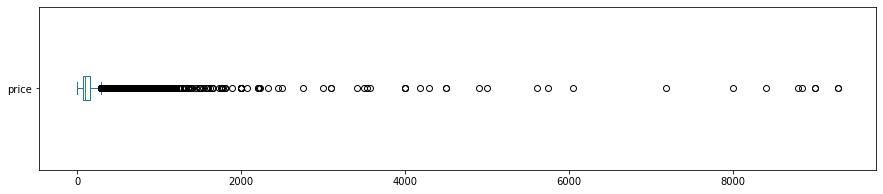

In [ ]:
df_paris1.price.plot(kind='box', vert=False, figsize=(15, 3),)
plt.show()

####Media dos alugueis


In [ ]:
valores = df_paris1.price.mean()
print("Temos o valor de €{:.1f} como a  media dos valores de aluguel em paris".format(valores))

Temos o valor de €141.0 como a  media dos valores de aluguel em paris


####Valor maximo dos alugueis


In [ ]:
valores_max = df_paris1.price.max()
print("O valor do aluguel mais caro em paris e de €{}".format(valores_max))
print("{} Entradas com valores acima de €400".format(len(df_paris1[df_paris1.price > 400])))
print("Essas Entradas representam {:.4f}% do DataFrame".format((len(df_paris1[df_paris1.price > 400]) / df_paris1.shape[0])*100))

O valor do aluguel mais caro em paris e de €9280
1352 Entradas com valores acima de €400
Essas Entradas representam 3.8625% do DataFrame


### **Q4. Qual a correlação existente entre as variáveis**

In [ ]:
corr = df_paris1[['price', 'minimum_nights', 'number_of_reviews', 'reviews_per_month',
    'number_of_reviews_ltm', 'availability_365']].corr()

display(corr)

,price,minimum_nights,number_of_reviews,reviews_per_month,number_of_reviews_ltm,availability_365
price,1.000000,-0.028259,-0.032925,-0.007384,-0.012582,0.172774
minimum_nights,-0.028259,1.000000,-0.069404,-0.134590,-0.096969,0.087042
number_of_reviews,-0.032925,-0.069404,1.000000,0.578799,0.533099,0.115090
reviews_per_month,-0.007384,-0.134590,0.578799,1.000000,0.698665,0.241122
number_of_reviews_ltm,-0.012582,-0.096969,0.533099,0.698665,1.000000,0.144126
availability_365,0.172774,0.087042,0.115090,0.241122,0.144126,1.000000


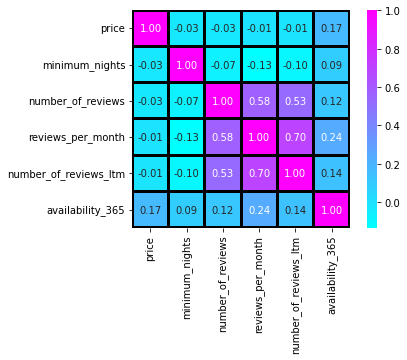

In [ ]:
sns.heatmap(corr, cmap='cool', fmt='.2f', square=True,linewidths = 2, linecolor='black', annot=True);

### **Q5. Qual o tipo de imóvel mais alugado no Airbnb?**

In [ ]:
df_paris1.room_type.value_counts()

Entire home/apt    26605
Private room        7020
Hotel room          1057
Shared room          321
Name: room_type, dtype: int64

**Os anfitriões do Airbnb podem listar casas/apartamentos inteiros, quartos privados ou compartilhados.**

**Dependendo do tipo de quarto, disponibilidade e atividade , um anúncio do airbnb pode ser mais parecido com um hotel, perturbador para os vizinhos, tirando moradia e ilegal.**


In [ ]:

tipos_locacoes= df_paris1.room_type.value_counts() / df_paris1.shape[0]
print(tipos_locacoes)


Entire home/apt    0.760078
Private room       0.200554
Hotel room         0.030197
Shared room        0.009171
Name: room_type, dtype: float64


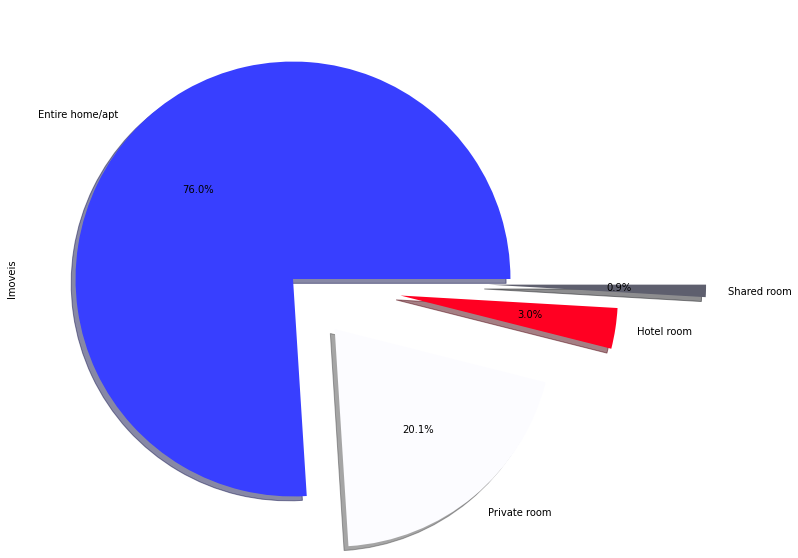

In [ ]:
c =['#383fff', '#fcfcff', '#ff0022', '#5e5f6e']
explode = (0, 0.3, 0.5, 0.9)

tipos_locacoes.plot(kind='pie' , autopct='%1.1f%%', colors=c,
                    figsize=(10, 10), shadow=True, explode=explode, label='Imoveis');

**Analisando os dados da coluna `room_type` percebemos  a preferência dos turistas que vao a cidade da luz a ferias ou trabalho, tem por casas e apartamentos .**







### **Q6. Qual a localidade mais cara do dataset?**



In [ ]:
graf1 = df_paris1.groupby(['neighbourhood']).price.mean().sort_values(ascending=False)[:10]

neighbourhood
Élysée            250.074262
Palais-Bourbon    210.278392
Luxembourg        202.585488
Passy             201.064555
Louvre            196.035516
Bourse            187.281903
Hôtel-de-Ville    185.830247
Temple            180.005862
Opéra             161.468668
Panthéon          157.981859
Name: price, dtype: float64


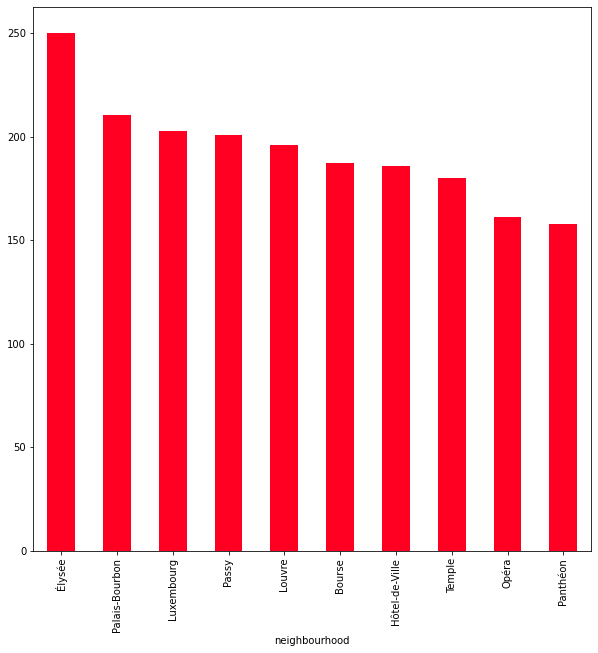

In [72]:
print(graf1)
graf1.plot(kind="bar", figsize=(10,10),);

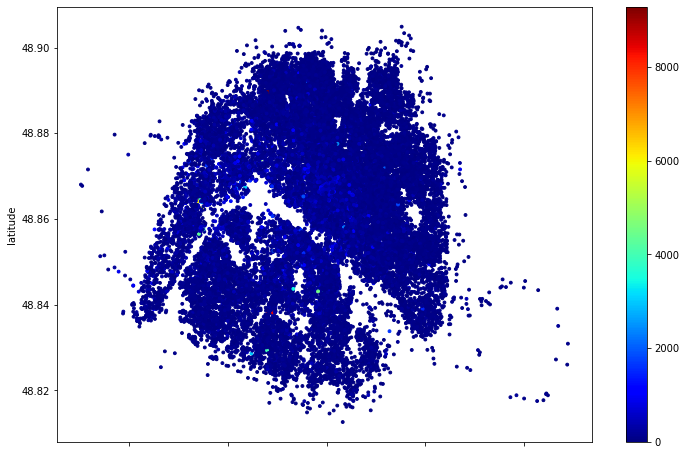

In [ ]:
df_paris1.plot(kind="scatter", x='longitude', y='latitude', alpha=2.0, c=df_paris1['price'], s=8,
              cmap=plt.get_cmap('jet'), figsize=(12,8));

### **Q7. Qual é a média do mínimo de noites para aluguel (minimum_nights)?**

In [ ]:
dias = df_paris1.minimum_nights.mean()
print("A media de Dias hospedando em paris é :{:.1f}".format(dias))

A media de Dias hospedando em paris é :5.7


## Conclusões


#**Após analisarmos superficialmente os dados do Airbnb na cidade de Paris, percebemos alguns parâmetros.**


---


##* Que 76% das pessoas que procuram o Airbnb para hospedagem, tem preferencia por apartamento e residencias;

##* Na belíssima cidade de Paris, temos uma média de 141 euros por noite de hospedagem, que convertido para reais fica 809 por noite.

##* Vimos que acimas de 400 euros temos 1352 entradas no nosso, data set, que mostra que a cidade da luz, também tem hospedagem para a classe de alto padrao.

##* Vimos que o local com a média mais alta em Paris foi Élysée, esse alto valor está relacionado, por ficar nas proximidades do palácio Élysée e do Arco do Triunfo.

##* A média de dias hospedados em Paris foi de 5,7, mostrando que normalmente os turistas tendem a passar uma semana.


---


##Esse foram as analises da cidade de paris para hospedagem usando o aplicativo Airbnb. 


